In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from src.algorithms.models.graph_manager import GraphManager
from src.algorithms.simulated_annealing import SimulatedAnnealing

clm = GraphManager(
    node_list='./temp/orders_with_depots.csv',
    max_cap=1000,
    vehicles=5
)

SA = SimulatedAnnealing(graph_manager=clm, epochs=35, attempts=30, 
                        initial_temp=1, cooling_rate=0.9)


In [2]:
solution = SA.optimize()
print(SA)

-----------Simulated Annealing Algorithm-----------
Current Temperature  : 0.05
Initial Temperature  : 1
Cooling Factor       : 0.9
Epochs               : 35
Attempts             : 30
Fleet size           : 5
Vehicle Capacity     : 1000
Total Locations      : 31
Total Depots         : 1
Initial Shortest     : 10299.89
Current Shortest     : 5489.11
---------------------------------------------------


In [3]:
# print routes
print('Total distance covered:', solution.total_length)
fleet = SA.to_fleet()
for vehicle in fleet:
    print(f'Vehicle: {vehicle.number}')
    for route in vehicle.routes:
        print(route)

Total distance covered: 5489.11
Vehicle: 001
<DoublyLinkedList (weight: 750, length: 608.6) Kraków -> Sandomierz -> Lublin -> Zamość -> Rzeszów -> Krosno -> Tarnów -> Kraków >
<DoublyLinkedList (weight: 800, length: 1626.26) Kraków -> Poznań -> Gromnik -> Gdańsk -> Gdynia -> Szczecin -> Szklarska Poręba -> Kraków >
<DoublyLinkedList (weight: 320, length: 171.16) Kraków -> Nowy Targ -> Zakopane -> Kraków >
Vehicle: 002
<DoublyLinkedList (weight: 300, length: 137.63) Kraków -> Katowice -> Kraków >
<DoublyLinkedList (weight: 400, length: 78.19) Kraków -> Chrzanów -> Kraków >
<DoublyLinkedList (weight: 880, length: 856.78) Kraków -> Puławy -> Krynica -> Białystok -> Radom -> Kielce -> Kraków >
Vehicle: 003
<DoublyLinkedList (weight: 60, length: 171.15) Kraków -> Szczucin -> Kraków >
<DoublyLinkedList (weight: 50, length: 138.35) Kraków -> Bielsko-Biała -> Kraków >
Vehicle: 004
<DoublyLinkedList (weight: 40, length: 188.25) Kraków -> Gliwice -> Kraków >
<DoublyLinkedList (weight: 40, length

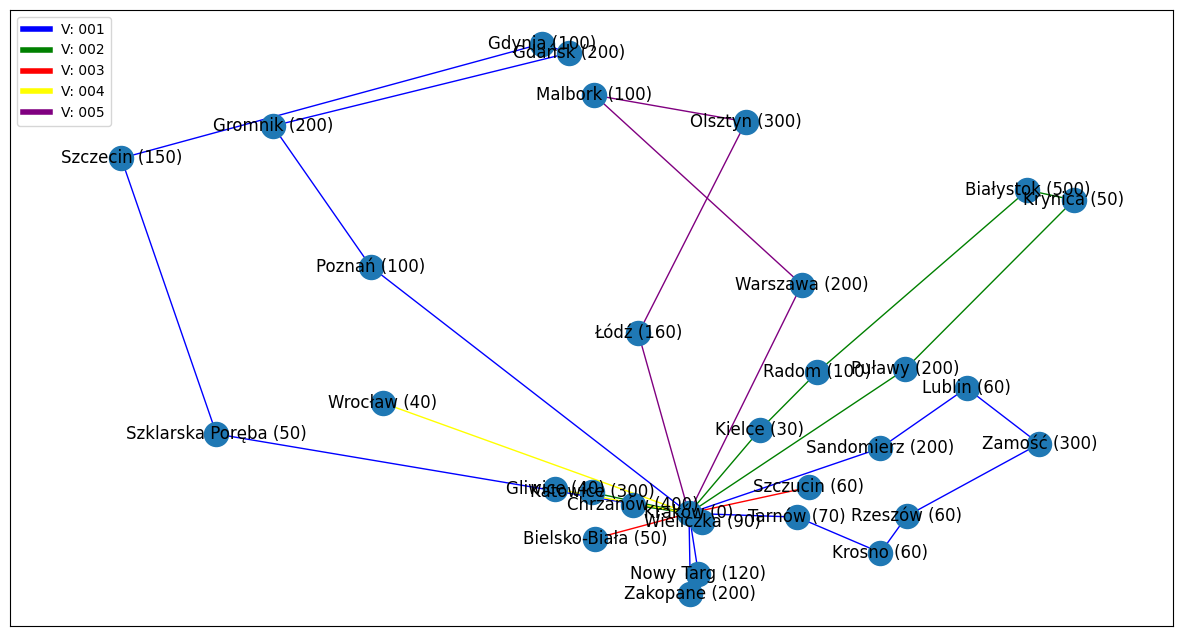

In [4]:
def generate_nx_graph(fleet):
    # Create a new graph
    plt.figure(figsize=(15, 8))
    G = nx.Graph()

    # Map for vehicle colors
    vehicle_colors = {}
    colors = ['blue', 'green', 'red', 'yellow', 'purple', 'orange']
    color_index = 0

    for vehicle in fleet:
        # Assign a color for each vehicle
        vehicle_color = colors[color_index % len(colors)]
        vehicle_colors[vehicle] = vehicle_color
        color_index += 1

        for route in vehicle.routes:
            previous_city = None
            for city in route:
                # Add node for each city with its geographical position
                G.add_node(city.name, pos=(city.lon, city.lat), label=f"{city.name} ({city.weight})")

                # Add edge if previous city exists
                if previous_city:
                    # Optionally, you can calculate the distance between cities to set as weight
                    G.add_edge(previous_city.name, city.name, color=vehicle_color)
                previous_city = city

    # Position nodes based on geographical coordinates
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the graph
    # Draw nodes with positions
    nx.draw_networkx_nodes(G, pos)

    # Draw edges with different colors
    for edge in G.edges(data=True):
        nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=edge[2]['color'])

    # Draw labels
    nx.draw_networkx_labels(G, pos, {n: d['label'] for n, d in G.nodes(data=True)})

    # Create a legend for vehicles
    vehicle_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in vehicle_colors.values()]
    plt.legend(vehicle_legend, [f"V: {v.number}" for v in vehicle_colors.keys()], loc='upper left')

    plt.axis('equal')  # Set equal scaling by x and y axes for correct geographical representation
    plt.show()

generate_nx_graph(fleet)
